<a href="https://colab.research.google.com/github/Thanhnga1801/Blinkit/blob/main/Blinkit_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_data.csv to blinkit_data.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('blinkit_data.csv')

**EXPLORATORY DATA ANALYSIS**

In [6]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


**Size of data**

In [7]:
print ('Size of data', df.shape)

Size of data (8523, 12)


**Field infor**

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Data types**

In [11]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [12]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


**DATA CLEANING**

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [16]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

In [17]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**BUSINESS REQUIREMENT**

# 1. KPIs
1. **Total sales**: from all items sold
2. **Average sales**: average revenue per sale
3. **Number of items**: Total count of different items sold
4. **Average ratings**: Average customer rating for items sold

In [30]:
# 1. Total sales
total_sales = df['Sales'].sum()
print(f'Total sales: ${total_sales:,.0f}')
# 2. Average sales
average_sales = df['Sales'].mean()
print(f'Average sales: ${average_sales:,.0f}')
# 3. Number of items sold
number_of_items_sold = df['Sales'].count()
print(f'Number of items sold: {number_of_items_sold:,.0f}')
# 4. Average ratings
average_ratings = df['Rating'].mean()
print(f'Average ratings: {average_ratings:,.0f}')

Total sales: $1,201,681
Average sales: $141
Number of items sold: 8,523
Average ratings: 4


# 2. Chart requirements
1. **Total sales by fat content**
*   To analyze the impact of fat content on total sales
*   Additional KPI metrics: assess how other KPIs (Average sales, number of items, average rating) vary with fat content
*   Chart type: Donut chart
2. **Total sales by item type**: average revenue per sale
*   To identify the performance of different item types in terms of total sales
*   Additional KPI metrics: assess how other KPIs (Average sales, number of items, average rating) vary with fat content
*   Chart type: Bar chart
3. **Fat content by outlet for total sales**:
*   To compare total sales across different outlets segmented by fat content
*   Additional KPI metrics: assess how other KPIs (Average sales, number of items, average rating) vary with fat content
*   Chart type: Stacked column chart

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64


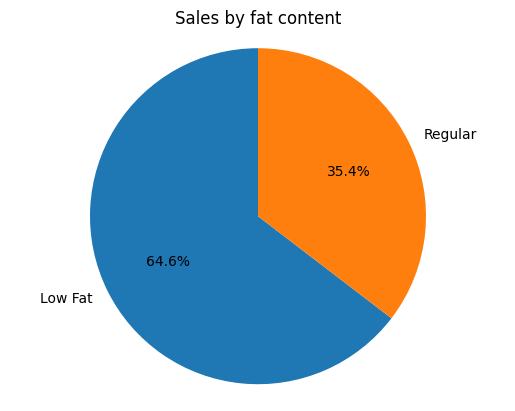

In [36]:
# 1. Total sales by fat content
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
print(sales_by_fat)
plt.pie(sales_by_fat, labels = sales_by_fat.index,
        autopct = '%.1f%%',
        startangle=90)
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


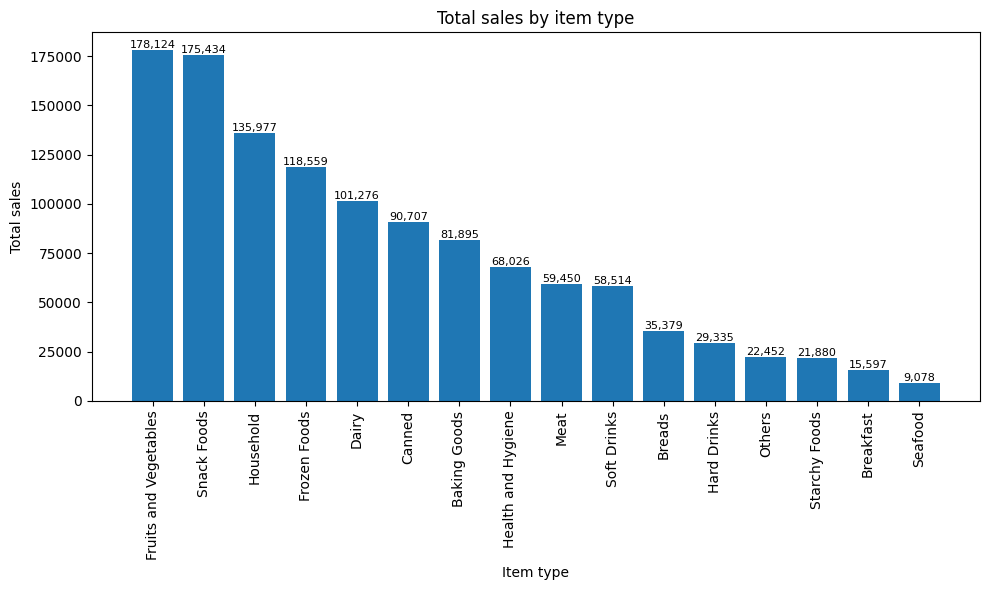

In [52]:
# Total sales by item type
sales_by_items_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
print(sales_by_items_type)
plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_items_type.index,sales_by_items_type.values)
plt.xticks(rotation=90)
plt.xlabel('Item type')
plt.ylabel('Total sales')
plt.title('Total sales by item type')

for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

Item Fat Content          Regular      Low Fat
Outlet Location Type                          
Tier 1                121349.8994  215047.9126
Tier 2                138685.8682  254464.7734
Tier 3                165326.0348  306806.9924


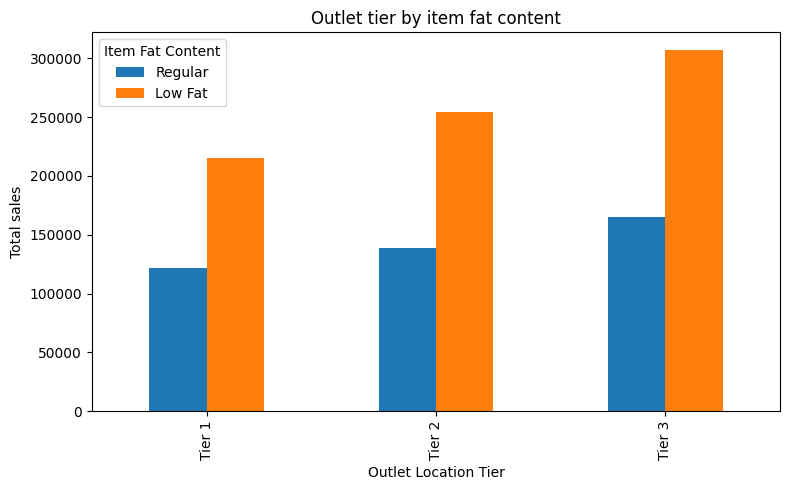

In [59]:
# 3. Fat content by outlet for total sales
group = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
group = group[['Regular','Low Fat']]
print(group)
ax = group.plot(kind='bar',figsize=(8,5),title='Outlet tier by item fat content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

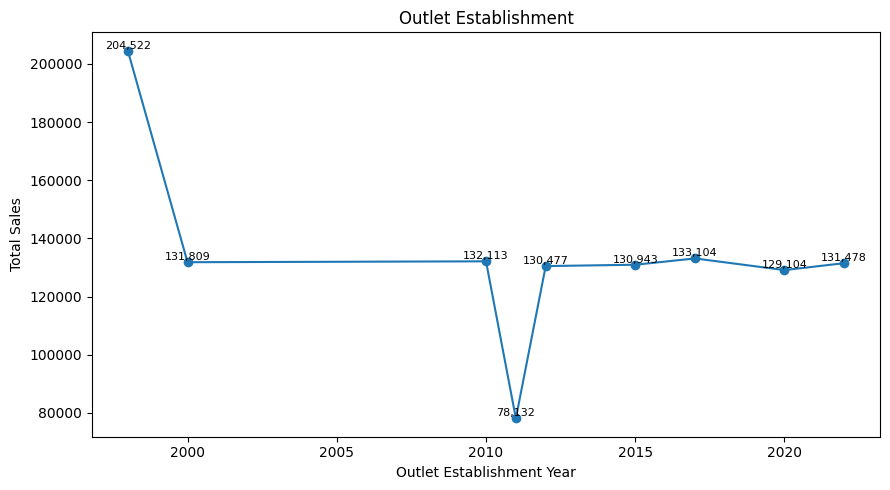

In [72]:
# Total sales by outlet establishment
from matplotlib.lines import lineStyles
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,
         sales_by_year.values,
         marker = 'o',
         linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()

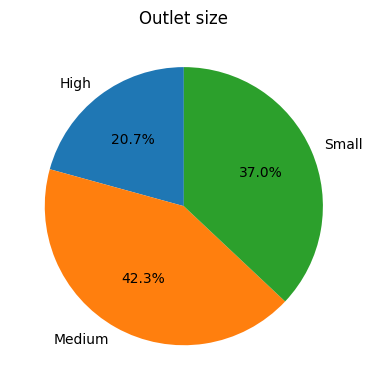

In [77]:
# Sales by outlet size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,
        labels=sales_by_size.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Outlet size')
plt.tight_layout()
plt.show()

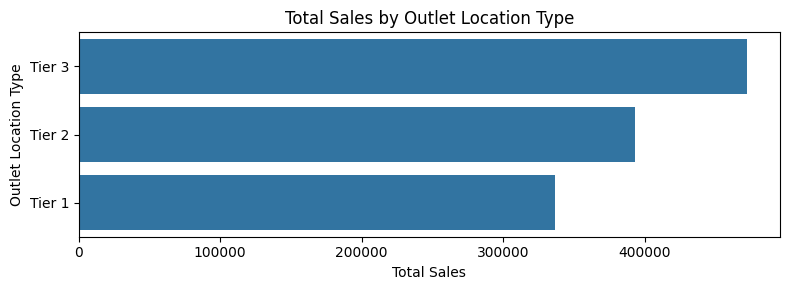

In [79]:
# Sales by outlet location
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()